In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import os
from main.utils.data_manage_utils import read_table_from_subfolder
# Variables
ROOT_PATH = os.path.abspath("../../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preparation/prepped_files")

In [5]:
data = pd.read_pickle(os.path.join(INPUT_FOLDER, "07_integration.pkl"))
data

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5626534,-11.0,-8.0,-2,223,2558.85060,4,-0.781831,0.62349,0.986286,-0.165048,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-7
5627321,-8.0,-8.0,-4,88,650.17336,5,-0.781831,0.62349,0.982450,-0.186524,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-11
5622325,-8.0,-7.0,302,57,170.59004,7,-0.781831,0.62349,0.979925,-0.199368,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,333
5626430,-11.0,-9.0,-2,98,719.37498,6,-0.781831,0.62349,0.956305,-0.292372,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,11
5625623,-11.0,-9.0,-4,76,363.71084,7,-0.781831,0.62349,0.945519,-0.325568,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291377,-11.0,-9.0,-11,220,2811.51698,2,0.000000,1.00000,0.985556,-0.169350,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-20
11292052,-11.0,-6.0,-2,264,3366.73928,2,0.000000,1.00000,0.977231,-0.212178,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-26
11290999,-11.0,-5.0,-1,246,3133.38498,3,0.000000,1.00000,0.960050,-0.279829,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
11290527,-11.0,-11.0,-4,276,3442.37826,4,0.000000,1.00000,0.958820,-0.284015,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-33


[-105, -75, -45, -15, 15, 45, 75, 105, 135]


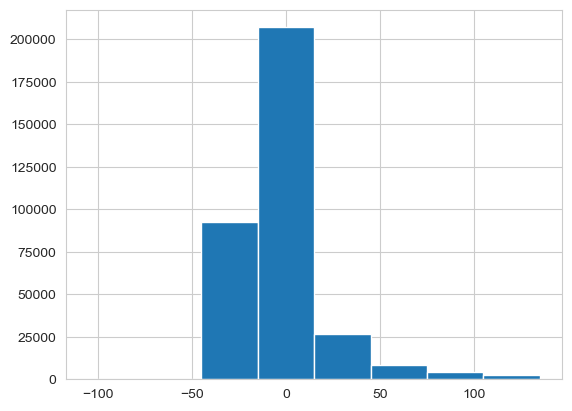

In [6]:
y = data[data.columns[-1:]].to_numpy()
X = data[data.columns[:-1]].to_numpy()
bins_pos = []

for bin_step in range(-105, 150, 30):
    bins_pos.append(bin_step)

print(bins_pos)
plt.hist(y, bins=bins_pos)
plt.show()

[]

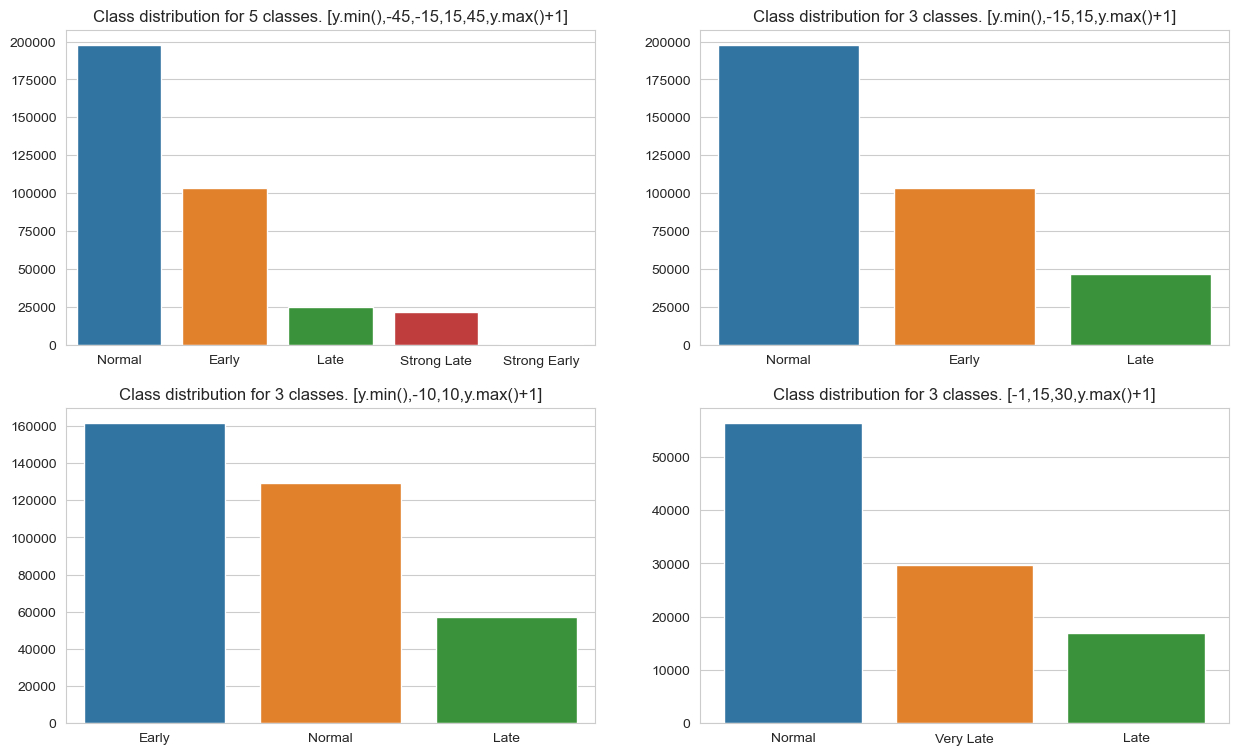

In [7]:
fig, axes = plt.subplots(2,2,figsize=(15,9))

bins1 = [y.min(),-45,-15,15,45,y.max()+1]
labels1 = ["Strong Early","Early","Normal","Late","Strong Late"]
bins2 = [y.min(),-15,15,y.max()+1]
labels2 = ["Early","Normal","Late"]
bins3 = [y.min(),-10,10,y.max()+1]
labels3 = ["Early","Normal","Late"]
bins4 = [-1,15,30,y.max()+1]
labels4 = ["Normal","Late","Very Late"]

axes[0][0].set_title("Class distribution for 5 classes. [y.min(),-45,-15,15,45,y.max()+1]")
axes[0][1].set_title("Class distribution for 3 classes. [y.min(),-15,15,y.max()+1]")
axes[1][0].set_title("Class distribution for 3 classes. [y.min(),-10,10,y.max()+1]")
axes[1][1].set_title("Class distribution for 3 classes. [-1,15,30,y.max()+1]")

data4 = data.where(data["ARR_DELAY_MINS"] >= 0).dropna()

cats1 = pd.cut(data.ARR_DELAY_MINS, bins1, labels = labels1,include_lowest = True)
cats2 = pd.cut(data.ARR_DELAY_MINS, bins2, labels = labels2,include_lowest = True)
cats3 = pd.cut(data.ARR_DELAY_MINS, bins3, labels = labels3,include_lowest = True)
cats4 = pd.cut(data4.ARR_DELAY_MINS, bins4, labels = labels4,include_lowest = True)

sns.barplot(x=list(cats1.value_counts().index), y= list(cats1.value_counts()), ax=axes[0][0])
sns.barplot(x=list(cats2.value_counts().index), y= list(cats2.value_counts()), ax=axes[0][1])
sns.barplot(x=list(cats3.value_counts().index), y= list(cats3.value_counts()), ax=axes[1][0])
sns.barplot(x=list(cats4.value_counts().index), y= list(cats4.value_counts()), ax=axes[1][1])

plt.plot()